<a href="https://colab.research.google.com/github/saheedniyi02/sport_plots_template/blob/main/FPL_game_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [352]:
pip install highlight_text

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import os
from PIL import Image
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from highlight_text import fig_text, ax_text
#from adjustText import adjust_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import matplotlib.pyplot as plt

In [354]:
font_path = "/content/drive/MyDrive/assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

#plt.style.use("../assets/stylesheets/soc_base.mplstyle")
plt.rcParams['font.family'] = 'Karla'

In [355]:
df_gk=pd.read_csv("/content/goalkeepers_points.csv")
df_fwd=pd.read_csv("/content/forwards_points.csv")
df_md=pd.read_csv("/content/midfielders_points.csv")
df_def=pd.read_csv("/content/defenders_points.csv")

In [356]:
df_gk["position"]="GKP"
df_fwd["position"]="FWD"
df_md["position"]="MID"
df_def["position"]="DEF"

In [357]:
df=pd.concat([df_fwd,df_md,df_def,df_gk])

In [358]:
df["team"].value_counts()

Spurs             15
Fulham            15
Newcastle         14
West Ham          14
Man Utd           14
Wolves            14
Brighton          14
Liverpool         14
Man City          13
Brentford         13
Chelsea           13
Everton           13
Aston Villa       13
Bournemouth       13
Nott'm Forest     13
Crystal Palace    12
Arsenal           12
Sheffield Utd     11
Burnley           10
Luton              9
Name: team, dtype: int64

In [359]:
clubs=["Arsenal","Crystal Palace"]
df=df[df["team"].isin(clubs)].sort_values("points").reset_index()

In [360]:
df

,level_0,index,name,team,points,value,position
0,81,Joel Ward2023-08-21T19:00:00Z,Joel Ward,Crystal Palace,1.510383,45,DEF
1,72,Tyrick Mitchell2023-08-21T19:00:00Z,Tyrick Mitchell,Crystal Palace,1.923693,45,DEF
2,114,Matheus França de Oliveira2023-08-21T19:00:00Z,Matheus França de Oliveira,Crystal Palace,2.112026,50,MID
3,62,Joachim Andersen2023-08-21T19:00:00Z,Joachim Andersen,Crystal Palace,2.154785,45,DEF
4,58,Marc Guéhi2023-08-21T19:00:00Z,Marc Guéhi,Crystal Palace,2.228990,45,DEF
5,68,Cheick Doucouré2023-08-21T19:00:00Z,Cheick Doucouré,Crystal Palace,2.740003,50,MID
6,66,Jeffrey Schlupp2023-08-21T19:00:00Z,Jeffrey Schlupp,Crystal Palace,2.819907,50,MID
7,62,Jefferson Lerma Solís2023-08-21T19:00:00Z,Jefferson Lerma Solís,Crystal Palace,2.865816,50,MID
8,57,Thomas Partey2023-08-21T19:00:00Z,Thomas Partey,Arsenal,2.939049,50,MID
9,17,Sam Johnstone2023-08-21T19:00:00Z,Sam Johnstone,Crystal Palace,3.033259,45,GKP


In [361]:
def clean_name(name):
  name=" ".join(name.split(" ")[:2])
  return name

In [362]:
df=df[["name","position","value","points","team"]].tail(15)

In [363]:
df["points"]=df["points"].round(3)
df["value"]=(df["value"]/10).round(1)
#df["name"]=df["name"].apply(clean_name)

In [364]:
df

,name,position,value,points,team
9,Sam Johnstone,GKP,4.5,3.033,Crystal Palace
10,Takehiro Tomiyasu,DEF,4.5,3.239,Arsenal
11,Leandro Trossard,MID,7.0,3.278,Arsenal
12,William Saliba,DEF,5.0,3.305,Arsenal
13,Declan Rice,MID,5.5,3.341,Arsenal
14,Benjamin White,DEF,5.5,3.616,Arsenal
15,Jordan Ayew,MID,5.5,3.793,Crystal Palace
16,Aaron Ramsdale,GKP,5.0,4.225,Arsenal
17,Odsonne Edouard,FWD,5.5,4.243,Crystal Palace
18,Eddie Nketiah,FWD,5.5,4.399,Arsenal


In [365]:
player_images={"Erling Haaland":"737066.png",
               "Harry Kane":"194165.png",
               "Aleksandar Mitrović":"351860.png",
               "Gabriel Fernando de Jesus":"576165.png",
               "Ivan Toney":"408987.png",
               "Dominic Solanke":"591734.png",
               "Ollie Watkins":"540088.png",
               "Callum Wilson":"184321.png",
               "Julián Álvarez":"974753.png",
               "Darwin Núñez Ribeiro":"950561.png",
               "Alexander Isak":"690107.png",
               "Cody Gakpo":"806552.png",
               "Taiwo Awoniyi":"643717.png",
               "Odsonne Edouard":"637746.png",
               "Neal Maupay":"391064.png",
               "Yoane Wissa":"666857.png",
               "Eddie Nketiah":"860920.png",
               "Mohamed Salah":"292462.png",
               "Kevin De Bruyne":"169200.png",
               "Bruno Borges Fernandes":"422685.png",
               "Bukayo Saka":"961995.png",
               "Martin Ødegaard":"534670.png",
               "Gabriel Martinelli Silva":"1021586.png",
               "Solly March":"416850.png",
               "Pascal Groß":"167008.png",
               "Phil Foden":"815006.png",
               "Kaoru Mitoma":"862608.png",
               "Eberechi Eze":"818975.png",
               "Jarrod Bowen":"523825.png",
               "Son Heung-min":"212867.png",
               "Marcus Rashford":"696365.png",
               "Kai Havertz":"749736.png",
               "Jordan Ayew":"154280.png",
               "Declan Rice":"654096.png",
               "William Saliba":"955406.png",
               "Leandro Trossard":"318615.png",
               "Takehiro Tomiyasu":"664444.png",
               "Kieran Trippier":"191869.png",
               "Rúben Gato Alves Dias":"614006.png",
               "João Cancelo":"361757.png",
               "Joël Veltman":"304455.png",
               "Adam Webster":"303346.png",
               "John Stones":"263653.png",
               "Lewis Dunk":"201690.png",
               "Reece James":"807729.png",
               "Pervis Estupiñán":"688278.png",
               "Manuel Akanji":"521318.png",
               "Andrew Robertson":"357880.png",
               "Ben Chilwell":"672469.png",
               "Axel Disasi":"696646.png",
               "Aaron Wan-Bissaka":"760320.png",
               "Virgil van Dijk":"209405.png",
               "Willy Boly":"246331.png",
               "Luke Shaw":"362694.png",
               "Trent Alexander-Arnold":"760712.png",
               "Raphaël Varane":"230982.png",
               "Benjamin White":"776151.png",
               "David Raya Martin":"562727.png",
               "Alisson Ramses Becker":"319784.png",
               "Bernd Leno":"215168.png",
               "Nick Pope":"280484.png",
               "Aaron Ramsdale":"746395.png",
               "Vicente Guaita":"109222.png",
               "Ederson Santana de Moraes":"363364.png",
               "Emiliano Martínez Romero":"268375.png",
               "Wes Foderingham":"212944.png",
               "Matt Turner":"729988.png",
               "Mark Flekken":"330643.png",
               "André Onana":"611491.png",
               "Sam Johnstone":"280287.png"
               }

In [375]:
gameweek=2

In [376]:
club_colors={"Arsenal":"#fadcdd",
             "Crystal Palace":"#bac9e3"}
club_texts={"Arsenal":"#e60b11",
             "Crystal Palace":"#1b458f"}
club_logos={"Arsenal":"https://images.fotmob.com/image_resources/logo/teamlogo/9825.png",
             "Crystal Palace":"https://images.fotmob.com/image_resources/logo/teamlogo/9826.png"}

In [377]:
def ax_player(player_url, ax):
    '''
    Plots the picture of a player at a specific axes.
    Args:
        Player_id (int): the id of the player according to Fotmob.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    player_image= Image.open(urllib.request.urlopen(player_url))
    ax.imshow(player_image)
    ax.axis('off')
    return ax

(-0.5, 191.5, 191.5, -0.5)

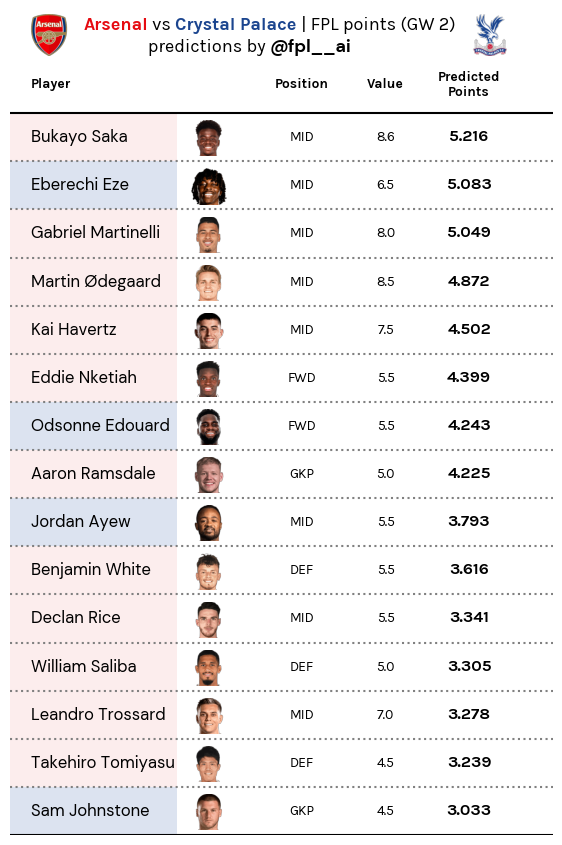

In [383]:
ncols=df.shape[1]
nrows=df.shape[0]

fig = plt.figure(figsize=(7,10), dpi=100)
ax = plt.subplot()

ax.set_xlim(0, ncols+1.5)
ax.set_ylim(0, nrows+1)

positions=[0.25,3.5,4.5,5.5,6.5]
columns=df.columns

for i in range(nrows):
    for j,col in enumerate(columns):
      if j!=4:
        if j==0:
          ha="left"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=clean_name(df[col].iloc[i]),
                    ha=ha,
                    va='center',fontsize=12,fontfamily = "DM Sans",
                )
        elif j==3:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df[col].iloc[i],
                    ha=ha,
                    va='center',weight="bold",fontsize=12
                )
        else:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df[col].iloc[i],
                    ha=ha,
                    va='center'
                )

for i,team in enumerate(df["team"]):
  ax.fill_between(x=[0,2],y1=i+1,y2=i,color=club_colors[team],alpha=0.5,ec='None')







cols=["Player","Position","Value","Predicted\nPoints"]
for j, col in enumerate(cols):
    ha="center"
    if j==0:
        ha="left"
    ax.annotate(
            xy=(positions[j], nrows+0.6),
                text=f"{col}",
                ha=ha,
                va='center', weight="bold" )

ax.set_axis_off()

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for i in range(1,nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [i, i], lw=1.5, marker='', zorder=4,color='gray', ls=':')

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.5])
ax_point_2 = DC_to_NFC([3, 1.25])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2, x + .1])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    #print(df["name"])
    name=df["name"].iloc[x]
    player_url=f"https://images.fotmob.com/image_resources/playerimages/{player_images[name]}"
    ax_player(player_url, flag_ax)

#header and logo
fig_text(
    x = 0.23, y = 0.93,
    s = f"<{clubs[0]}> vs <{clubs[1]}> | FPL points (GW {gameweek})\n               predictions by <@fpl__ai>",
    color = "black",
    size = 13,
    highlight_textprops = [
        {"weight":"bold","color":f"{club_texts[clubs[0]]}"},
        {"weight":"bold","color":f"{club_texts[clubs[1]]}"},
        {"weight":"bold","family": "DM Sans",},
    ],
    annotationbbox_kw={"xycoords": "figure fraction"}
)


#Get and Open the club logo
club_logo1 = Image.open(urllib.request.urlopen(club_logos[clubs[0]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.15, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo1)
#switch off  the axis off our AXES
logo_ax.axis("off")

#Get and Open the club logo
club_logo2 = Image.open(urllib.request.urlopen(club_logos[clubs[1]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.78, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo2)
#switch off  the axis off our AXES
logo_ax.axis("off")